## 介绍：机器学习项目第一部分

### 项目目标
* 确定能源之星评分数据集中的预测因素。
* 使用提供的建筑能源消耗数据开发模型，并预测建筑物的能源之星的得分（0-100的连续值）。
* 解释模型结果。

纽约市建筑能源消耗数据[来源](https://github.com/WillKoehrsen/machine-learning-project-walkthrough)

* 监督问题：我们既有特征又有目标
* 回归问题：目标是一个连续变量，在本例中范围是0-100

在训练过程中，我们希望模型学习特征和分数之间的关系，以便我们同时给出特征和答案。然后，为了测试模型的学习效果，我们在一个从未见过答案的测试集中对其进行评估！

## 机器学习——工作流程
1. 数据清洗与格式转换
2. 探索性数据分析
3. 特征工程与选择
4. 建立基础模型，比较多种模型性能指标
5. 模型超参数调参，针对问题进行优化
6. 在测试集上评估最佳模型
7. 尽可能解释模型结果
8. 得出结论，并提交答案

这些过程并不是严格的从头到尾，可能在4建立模型时，发现1的数据清洗有问题，再回来做1，该项目包含3个notebook

### 导入所需的基本工具包

可设置默认参数

In [1]:
# 操作数据必备包
import pandas as pd
import numpy as np

# 消除警告，比如说提示版本升级之类的
import warnings
warnings.simplefilter('ignore')

# 设置最大显示列为60，还有max_rows则是设置最大列
pd.set_option('display.max_columns', 60)

# Matplotlib 可视化
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 24  # 设置字体大小

from IPython.core.pylabtools import figsize  # 设置画图大小

import seaborn as sns  # 画图工具
sns.set(font_scale=2)

from sklearn.model_selection import train_test_split  # 切分数据集工具

## 数据清洗
[pandas](https://pandas.pydata.org/pandas-docs/stable/)读取数据

In [2]:
# Read in data into a dataframe
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

data.head()  # display top of dataframe

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2 Postal Code  \
0  201/205  East  42nd  st.            Not Available       10017   
1          622 168th Street            Not Available       10032   
2             3975 Broadway            Not Available       10032   
3   161 Fort Washington Ave  177 Fort Washington Ave       10032   
4     710 West 168th Street            Not Available       10032   

  Street Number           Street Name    Borough  DOF Gross Floor Area  \
0           675              3 AVENUE  Manhattan              289356.0   
1           180  FT WASHINGTON AVENUE  Manhattan             3693539.0   
2          3975              BROADWAY  Manhattan              152765.0   
3           161  FT WASHINGTON AVENUE  Manhattan              891040.0   
4           193  FT WASHINGTON AVENUE  Manhattan              211400.0   

   Primary Property Type - Self Selected  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   
2                                             231342   
3                                            1305748   
4                                             179694   

  2nd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   
3                 Not Available   
4                 Not Available   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                     Not Available   
1                                     Not Available   
2                                     Not Available   
3                                     Not Available   
4                    

In [7]:
data.shape

(11746, 60)

数据集共有60列，我们并不知道这些列的具体意思，虽然机器学习中，我们可以不用理解列，只需要放进去让模型告诉我们哪个重要。

但在实际场景中，如果想要模型效果有更好的提升，就不可以避免的要对某个别列做相应处理，或者交叉特征，甚至需要向业务人员解释。

具体列信息可以参考data目录下的2016_nyc_benchmarking_data_disclosure_definitions.pdf，其中**ENERGY STAR Score是标签列（0-100的评分）**

而ENERGY STAR Score的评分方法也很简单，建筑持有者提供自我报告的能源使用情况，根据这些提供的自我报告数据来评分排名。

## 数据类型与缺失值

dataframe.info 可以快速查看数据类型与缺失值

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

* 大部分数据被记录为object，在处理前必须转换为数值型，如float。
* 上面都是non-null表示没有缺失值，但不一定真的没有缺失值（np.nan），可能是缺失值的标记符号不一样，查看上面的数据，中间有很大部分是Not Available，Not Available应该就是缺失值。

In [9]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available':np.nan})

# Iterate through the columns
for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in
       col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [10]:
# Statistics for each column
data.describe()

Order   Property Id  DOF Gross Floor Area  \
count  11746.000000  1.174600e+04          1.162800e+04   
mean    7185.759578  3.642958e+06          1.732695e+05   
std     4323.859984  1.049070e+06          3.367055e+05   
min        1.000000  7.365000e+03          5.002800e+04   
25%     3428.250000  2.747222e+06          6.524000e+04   
50%     6986.500000  3.236404e+06          9.313850e+04   
75%    11054.500000  4.409092e+06          1.596140e+05   
max    14993.000000  5.991312e+06          1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)  \
count                                       1.174400e+04    
mean                                        1.605524e+05    
std                                         3.095746e+05    
min                                         5.400000e+01    
25%                                         6.520100e+04    
50%                                         9.132400e+04    
75%                                         1.532550e+05    
max                                         1.421712e+07    

       2nd Largest Property Use - Gross Floor Area (ft²)  \
count                                        3741.000000   
mean                                        22778.682010   
std                                         55094.441422   
min                                             0.000000   
25%                                          4000.000000   
50%                                          8654.000000   
75%                                         20000.000000   
max                                        962428.000000   

       3rd Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                        1484.000000       11746.000000   
mean                                        12016.825270        1948.738379   
std                                         27959.755486          30.576386   
min                                             0.000000        1600.000000   
25%                                          1720.750000        1927.000000   
50%                                          5000.000000        1941.000000   
75%                                         12000.000000        1966.000000   
max                                        591640.000000        2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11746.000000  11746.000000        9642.000000   
mean                              1.289971     98.762557          59.854594   
std                               4.017484      7.501603          29.993586   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          37.000000   
50%                               1.000000    100.000000          65.000000   
75%                               1.000000    100.000000          85.000000   
max                             161.000000    100.000000         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count         11583.000000                            10281.000000   
mean            280.071484                              309.747466   
std            8607.178877                             9784.731207   
min               0.000000                                0.000000   
25%              61.800000                               65.100000   
50%              78.500000                               82.500000   
75%              97.600000                              102.500000   
max          869265.000000                           939329.000000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                       10959.000000         
mean                                           11.072643         
std                                           127.733868         
min                                             0.000000         
25%   

现在能看到部分列的count没有达到11746个，即表明其中有NaN值。

### 缺失值
计算每个列缺失的比例，这里提供一个函数。

In [11]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
   
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
       
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


Missing Values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property Use Type                                10262   
Fuel Oil #2 Use (kBtu)                                        9165   
2nd Largest Property Use Type                                 8005   
2nd Largest Property Use - Gross Floor Area (ft²)             8005   
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
Latitude                                                      2263   
Longitude                                                     2263   
Community Board                                               2263   
Council District                                              2263   
Census Tract                                                  2263   
NTA                                                           2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Borough                                                        118   
DOF Gross Floor Area                                           118   
Water Required?                                                118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
NYC Borough, Block and Lot (BBL) self-reported                  11   
BBL - 10 digits                                                 11   
Largest Property Use Type                                        2   
Largest Property Use Type - Gross Floor Area (ft²)               2   

                                                    % of Total Values  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.9  
Address 2                                                        98.2  
Fuel Oil #5 & 6 Use (kBtu)                                       94.9  
District Steam Use (kBtu)                                        92.0  
Fuel Oil #4 Use (kBtu)                                           88.8  
3rd Largest Property Use Type - Gross Floor Are...               87.4  
3rd Largest Property Use Type                                    87.4  
Fuel Oil #2 Use (kBtu)                                           78.0  
2nd Largest Property Use Type            

一般而言，我们不希望丢失任何数据，但我们也不希望数据对模型有负影响，所以我们尽可能减少无意义的、负影响的数据，这里我对缺失值超过50%的进行剔除。

实际业务场景：我们曾尝试过使用缺失率较大的特征，使用后模型结果大幅度上涨，表明上看是好的，特征重要性也是最高的，我们产生了疑惑，随之去追溯数据源，发现有很大部分正样本有该数据，绝大多数负样本都没有，这样模型就以为有值的就是正样本，这其实是不正确的，后面我们修改了SQL语句，重新拿了数据集，模型结果才趋向正常

In [13]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values']> 50].index)
print('We will remove %d columns.'% len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [14]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

## Exploratory Data Analysis
利用画图来理解数据

### 单变量绘图

Text(0.5, 1.0, 'Energy Star Score Distribution')

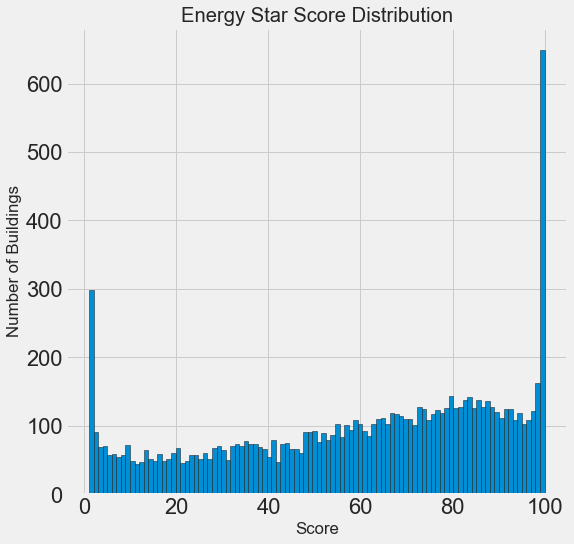

In [15]:
figsize(8,8)

# Rename the score
data = data.rename(columns = {'ENERGY STAR Score':'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(),bins = 100,edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

发现得分1和100的个数过多，按理来说得分应该是比较平均的，或者越高分约少，从上面介绍可知，建筑信息是由个人提交的，而个人会提交更少的用电量，人为的提高得分，从上图可以看出高分的建筑反而更多。

这些都是不客观的，我们希望能有一个更客观的评分标准。

能源使用强度（EUI），它是总能源使用量除以建筑物的面积（平方英尺）。这个能源使用量不是自我报告的，因此更客观地衡量建筑物的能源效率。

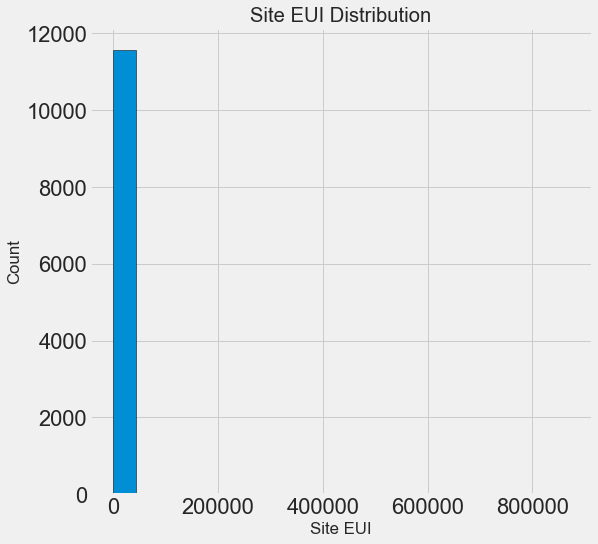

In [16]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');

可以看出绝大部分值都是偏小的，只有极大值时，X轴的跨度才会这么大,说明有一个或极少个非常大的极值。

In [17]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [18]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

其中一栋建筑的得分远远高于其他建筑。

In [19]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

Order  Property Id Property Name                   Parent Property Id  \
8068   9984      4414323  234 Skillman  Not Applicable: Standalone Property   

                     Parent Property Name BBL - 10 digits  \
8068  Not Applicable: Standalone Property      3028937502   

     NYC Borough, Block and Lot (BBL) self-reported  \
8068                                     3028937502   

     NYC Building Identification Number (BIN) Address 1 (self-reported)  \
8068                        3390250 , 3338313       234 Skillman avenue   

     Postal Code Street Number      Street Name   Borough  \
8068       11211           234  SKILLMAN AVENUE  Brooklyn   

      DOF Gross Floor Area Primary Property Type - Self Selected  \
8068               61811.0                   Multifamily Housing   

     List of All Property Use Types at Property Largest Property Use Type  \
8068                        Multifamily Housing       Multifamily Housing   

      Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
8068                                            56900.0         2004   

      Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
8068                                    1         90         Whole Building   

     Metered Areas  (Water)  score  Site EUI (kBtu/ft²)  \
8068                    NaN    1.0             869265.0   

      Weather Normalized Site EUI (kBtu/ft²)  \
8068                                939329.0   

      Weather Normalized Site Electricity Intensity (kWh/ft²)  \
8068                                                9.9         

      Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
8068                                             9393.0            

      Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
8068                                  986366.0            4.945919e+10   

      Weather Normalized Site Natural Gas Use (therms)  \
8068                                       534458968.8   

      Electricity Use - Grid Purchase (kBtu)  \
8068                               1983655.6   

      Weather Normalized Site Electricity (kWh)  \
8068                                   563239.6   

      Total GHG Emissions (Metric Tons CO2e)  \
8068                               2627199.1   

      Direct GHG Emissions (Metric Tons CO2e)  \
8068                                2627015.0   

      Indirect GHG Emissions (Metric Tons CO2e)  \
8068                                      184.1   

      Property GFA - Self-Reported (ft²)  \
8068                             56900.0   

      Water Use (All Water Sources) (kgal)  \
8068                                2547.9   

      Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
8068                                          44.78               912801.1   

                Release Date Water Required?  \
8068  05/01/2017 11:34:14 PM             NaN   

     DOF Benchmarking Submission Status   Latitude  Longitude  \
8068                      In Compliance  40.716233  -73.94141   

      Community Board  Council District  Census Tract  \
8068              1.0              34.0         477.0   

                                                    NTA  
8068  East Williamsburg                             ...

异常值的可能性有输入错误、测量设备故障、不正确的单位、或者可能是真实的。

对于异常值，我们一般抛弃，因为其不代表数据的实际情况。（在个别场景中，我们需要这些异常值）

## 剔除异常值

处理离群点时，不能主观的判断，导致丢失数据，如何去除[异常值](https://people.richland.edu/james/lecture/m170/ch03-pos.html)，处理时尽可能保守：

* 在低端，值低于 $\text{First Quartile} -3 * \text{Interquartile Range}$
* 在高端，值高于 $\text{Third Quartile} + 3 * \text{Interquartile Range}$

In [20]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)']>(first_quartile - 3*iqr)) & (data['Site EUI (kBtu/ft²)']<(third_quartile + 3*iqr))]

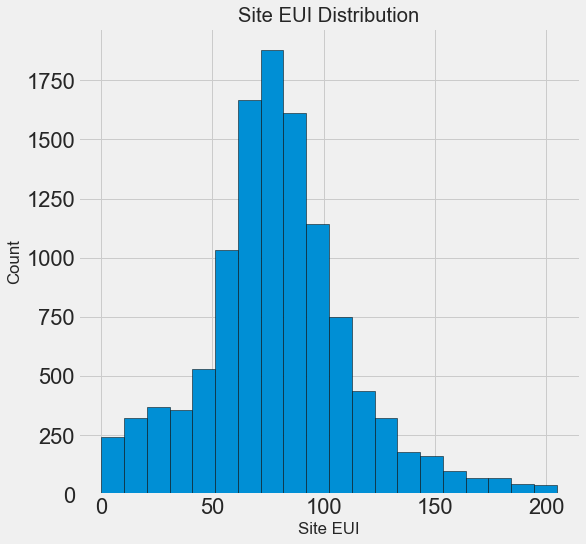

In [16]:
# Histogram Plot of Site EUI

figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');

处理完的结果近似正态分布

## 观察哪些变量对结果产生影响

In [21]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
Alltypes_num = types['Largest Property Use Type'].value_counts()  # 使用该特征做计数是因为其没有缺失值
types = list(Alltypes_num[Alltypes_num.values > 100].index)

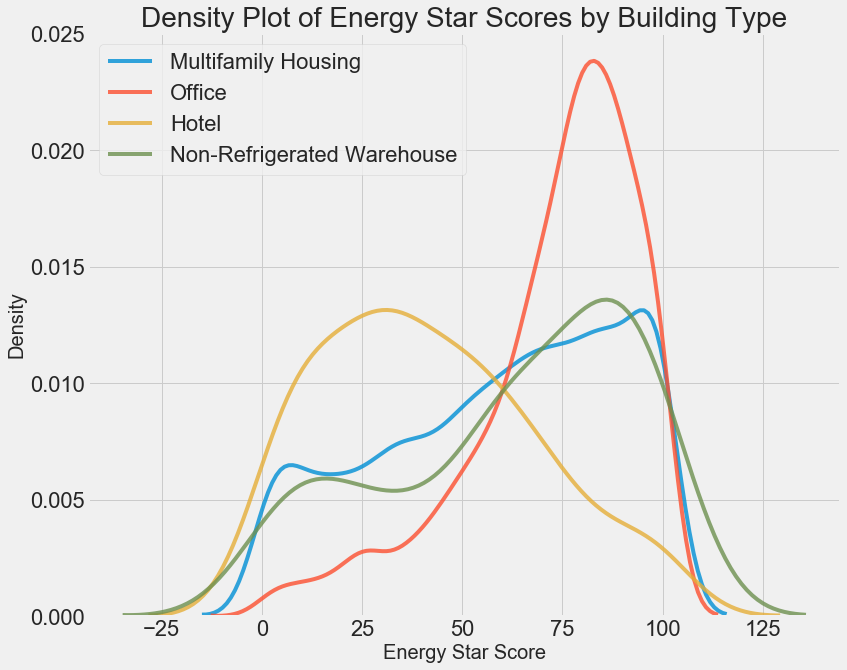

In [18]:
figsize(12,10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot pf Engergy Star scores
    sns.kdeplot(subset['score'].dropna(),label = b_type,shade = False, alpha = 0.8)
    
plt.xlabel('Energy Star Score', size = 20); 
plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

当特征差异越明显，模型能学到的效果越好，如红色和黄色

我们再看另外一组数据

In [27]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

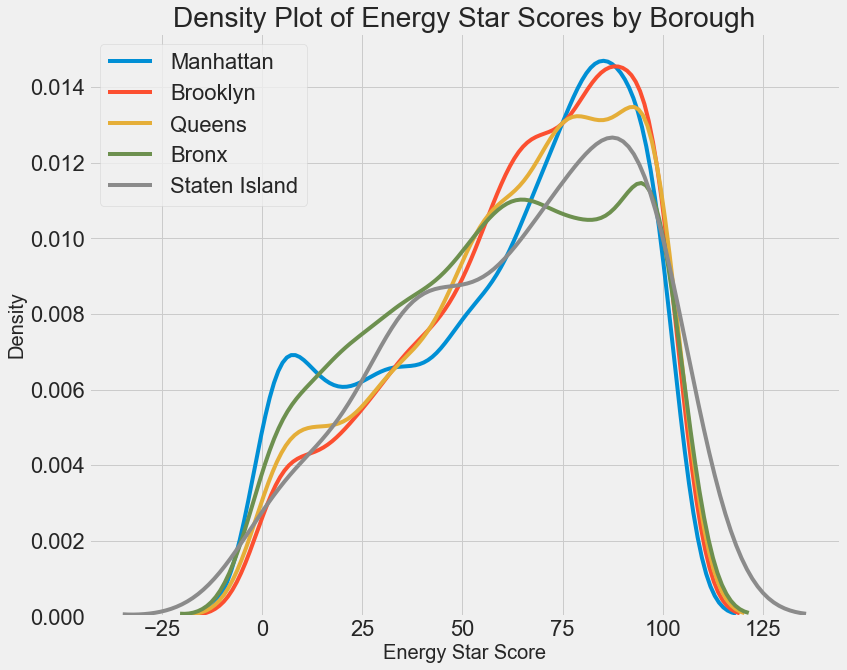

In [28]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

## 特征和标签之间的相关性
Pearson 相关系数，帮助我们筛选特征，其得到两个变量之间线性关系的强度和方向的度量。负数表示负相关，越大影响越大，正数表示正相关，越大影响越大。
<img src="data/correlation_examples.png" width="100%">

虽然特征之间可能存在非线性关系，且相关系数不能解释特征之间的交互作用，但依然是探索数据的一种较好方式。

In [19]:
# Find all correlations and sort
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlation
print(correlations_data.head(15),'\n')

# Print the most positive correlation
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

Site EUI（kBtu /ft²） 和 EUI - Weather Normalized Site EUI （kBtu /ft²）呈现高负相关，单位用电量强度越高，能源利用率越低。这也符合我们的场景，这是线性相关。

为了解释非线性相关，可以对特征进行，如平方、log等，然后根据分数计算相关系数。而对于建筑类型或行政区这些类别变量还可以用one-hot encode。

In [20]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
     # Skip the Energy Star Score 
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_ '+ col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns     
categorical_subset = data[['Borough','Largest Property Use Type']]

# one hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
features = pd.concat([numeric_subset,categorical_subset],axis =1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score
correlations = features.corr()['score'].dropna().sort_values()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [21]:
# Display the most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)                          -0.713993
sqrt_ Site EUI (kBtu/ft²)                                       -0.699817
sqrt_ Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_ Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_ Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                        -0.645542
Source EUI (kBtu/ft²)                                           -0.641037
log_Source EUI (kBtu/ft²)                                       -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                    -0.620329
log_Site EUI (kBtu/ft²)                                         -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                      -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)     -0.424246
sqrt_ Weather Normalized Site Electric

In [22]:
# Display the most positive correlations
correlations.tail(15)

sqrt_ Order                                                        0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_ Community Board                                              0.058029
sqrt_ Council District                                             0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

看来经过变换后并没有发生明显的变化，相关性强的依然强。而one-hot后新出现的Largest Property Use Type_Office 称为正相关性最强的，所以我们的做法是有效的。

## 双变量绘图

D:\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


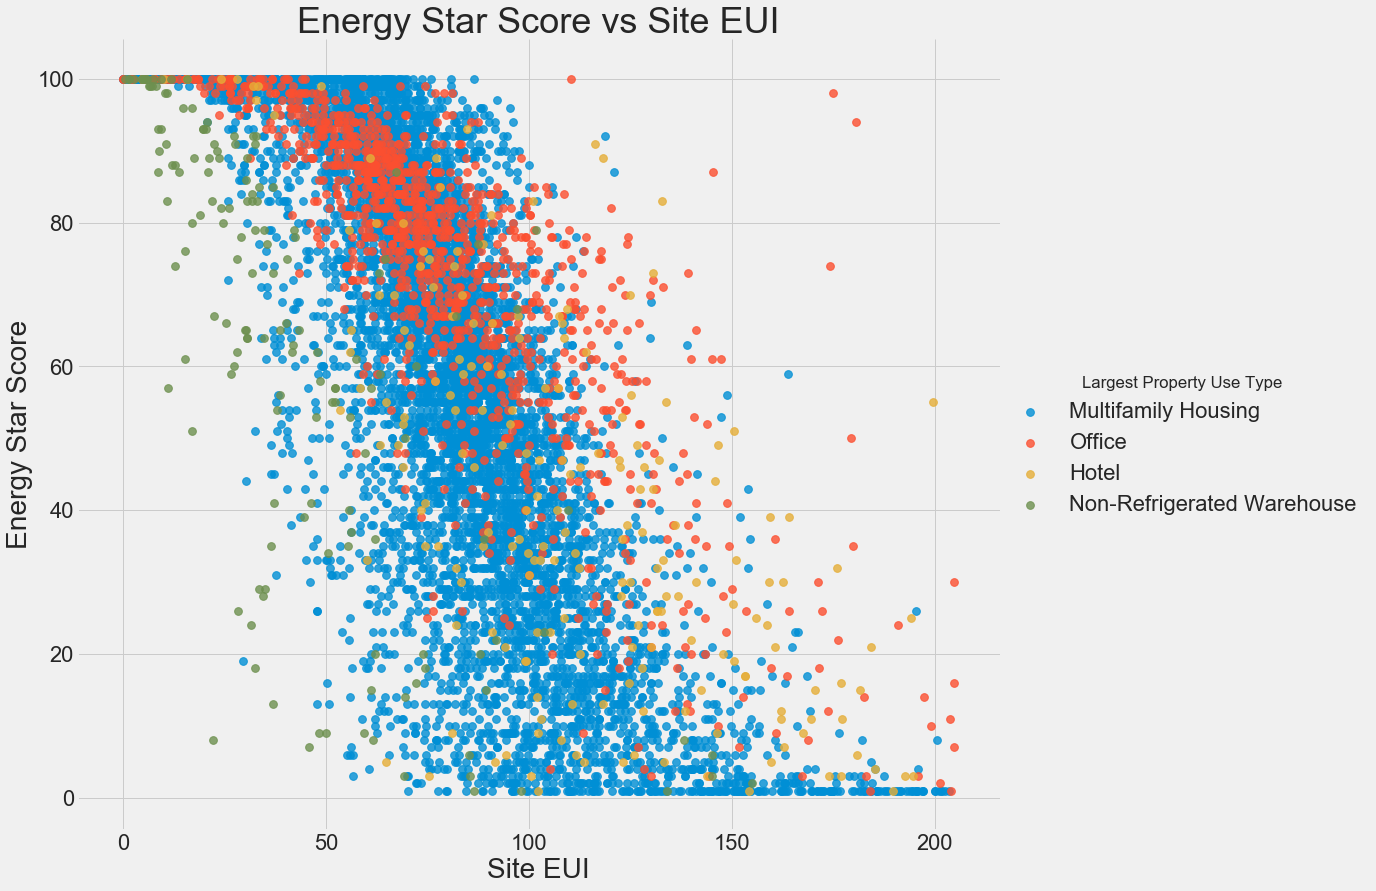

In [23]:
figsize(12,10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI 
sns.lmplot('Site EUI (kBtu/ft²)','score',
          hue = 'Largest Property Use Type',
          data = features,
          scatter_kws = {'alpha':0.8,'s': 60},
          fit_reg = False,
          size = 12,
          aspect = 1.2)

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

## Pairs Plot
绘制多种图，上三角形为散点图，对角线为直方图，下三角为两个变量间的相关系数和核密度估算

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


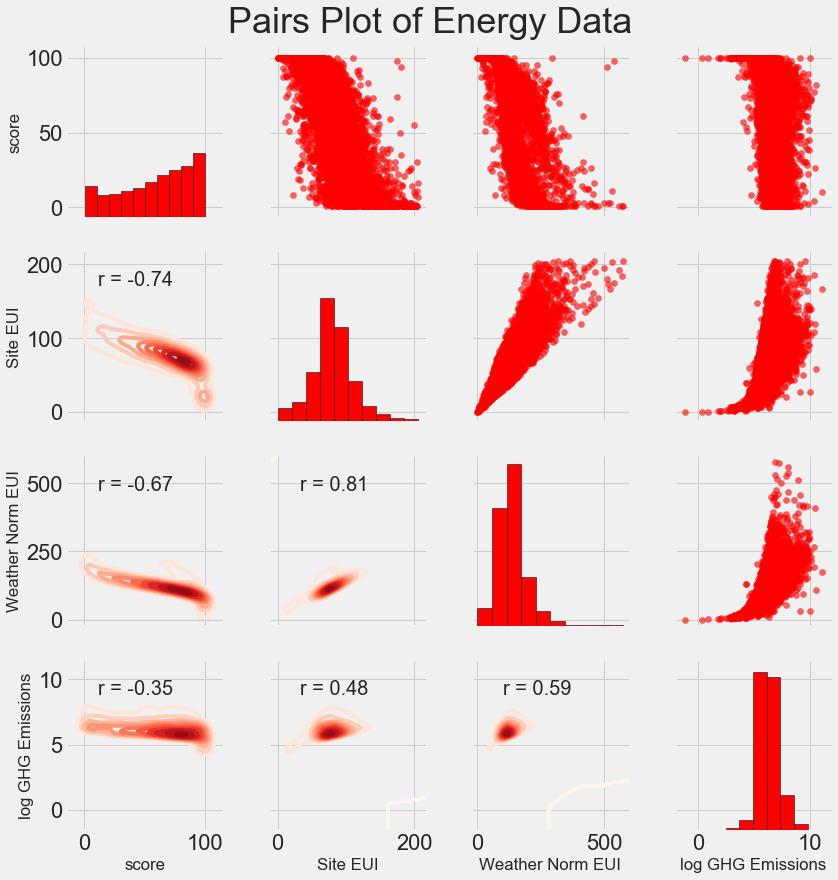

In [24]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

我们可以查看两个特征的相交关系，如左下角的log GHG Emissions 和 score的相关系数为-0.35，右上角可以看到这种关系的散点图

## 特征工程与选择
目前我们已经探索了数据之间的趋势和关系，可以为其构建一组特征。我们还可以利用EDA的结果来指导特征工程：
* 得分的分布情况因建筑类型不同而有所不同，在较小的程度上因自治区而异。
* 采用特征的对数变换不会导致特征与分数之间的线性相关性显着增加。

如何定义特征工程与选择：
* [特征工程](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)：获取原始数据并提取或创建新特征的过程，这些特征允许机器学习模型学习这些特征和目标之间的映射。这可能意味着对变量进行转换，比如log和平方根的处理，或者对分类变量进行热编码，这样它们就可以在模型中使用了。一般来说，我认为的特征工程指的是添加从原始数据派生的附加特性。
* [特征选择](https://machinelearningmastery.com/an-introduction-to-feature-selection/)：选择数据中最相关的功能的过程。“最相关”可能取决于许多因素，可能是一些简单的东西，如与目标的最高相关性，或具有最大方差的特征。在特征选择中，我们删除那些不能帮助我们的模型学习特征和目标之间关系的特征。这有助于模型更好地推广到新的数据中，从而得到更具解释性的模型。一般来说，我认为特征选择是减去特征，所以我们只剩下那些最重要的。

特征工程与选择是迭代过程，需要多次尝试才能正确。通常，我们会使用建模的结果（例如随机森林的特征重要性）返回并重做特征选择，或者需要创建新变量的关系。这些过程通常也包含领域知识和数据统计质量的混合。

[特征工程与选择](https://www.featurelabs.com/blog/secret-to-data-science-success/)通常在机器学习问题上的时间回报率最高。它可能需要相当长的时间才能得到正确的结果，但往往比精确的算法和用于模型的超参数更重要。如果我们没有给模型提供正确的数据，那么我们也不期望它能学习到好东西！

在本项目中，我们将使用以下步骤：
* 数值型变量和两个分类的变量
* 加入数值变量的对数变换
* One-Hot的分类变量

对于特征选择，我们将使用以下操作：
* 删除[共线特征](https://statinfer.com/204-1-9-issue-of-multicollinearity-in-python/)

选择数值特性，添加所有数值型特性的log转换，将分类特征做Ont-Hot Encode，并将这些特征集连接在一起。

In [25]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset  = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorial columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


(11319, 110)

到这里为止，我们已经有了11319行和109列特征（有一列是分数），但并不是每个特征对结果都有正影响，有一些是多余的，因为他们高度相关。

### 去除共线特征
在数据集中，Weather Normalized Site EUI (kBtu/ft²和Site EUI (kBtu/ft²)高度相关，因为它们只是计算能源使用强度的方法略有不同。

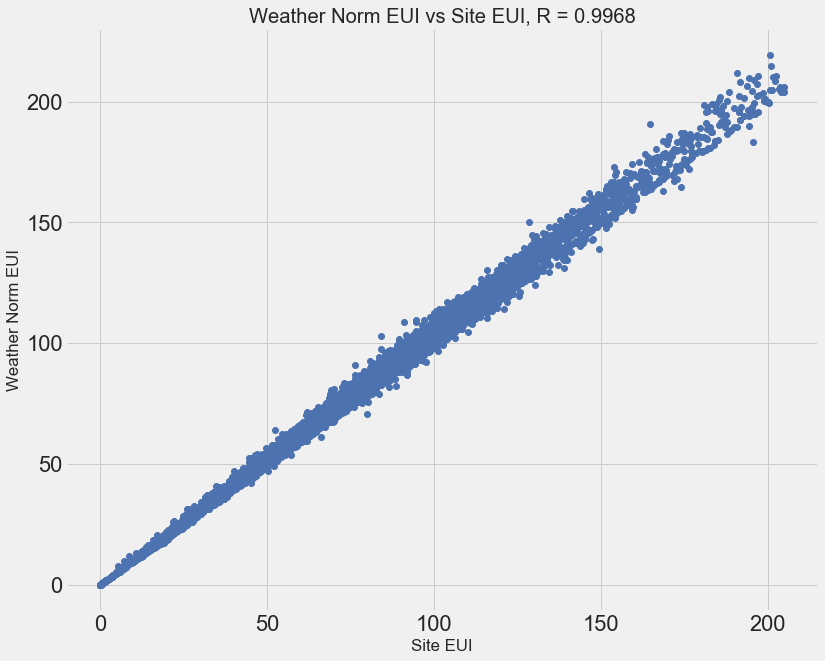

In [26]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)','Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'],plot_data['Weather Normalized Site EUI (kBtu/ft²)'],'bo')

plt.xlabel('Site EUI'); 
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)',
                                                                        'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

一般高度关联的特征我们是去除的，只保留一个为模型提供必要信息。

去除共线特征是一种通过减少特征数量来降低模型复杂度的方法，有助于提高模型的泛化能力。它还可以帮助我们解释模型，因为我们只需要担心单一变量，比如EUI，而不是Weather Normalized Site EUI (kBtu/ft²和Site EUI (kBtu/ft²)如何影响得分。

除了这个还有很多方法，如：[方差膨胀因子/系数](http://www.statisticshowto.com/variance-inflation-factor/)，这里我们将使用更简单的方法，并删除相关系数高于某个阈值的特征（不是与分数相关，是两变量之间的相关，我们需要与分数高度相关的变量！）。关于删除共线变量的更彻底的讨论，可以参考这个[this notebook on Kaggle](https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity/code).

下面的通过比较两个特征，基于我们为相关系数选择的阈值来删除共线特征。它还打印出它去除的相关性，这样我们就可以看到调整阈值的效果。如果特征之间的相关系数超过这个值，我们将使用0.6的阈值来删除一对特征中的一个。

In [27]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [28]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater_equal


In [29]:
# Remove any columns with all nan values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

现在数据集有64个特性(其中一个列是target)。这仍然是相当多，但主要是因为我们有一个One-Hot的分类变量。此外，虽然大量的特征对于线性回归等模型可能存在问题，但随机森林等模型执行隐式特征选择，并自动确定哪些特征在训练过程中是重要的。还有其他的特性选择步骤，但是现在我们将保留我们所有的特性，看看模型是如何执行的。

**附加的特征选择**

有很多的特征选择方法，常用的方法有主成分分析(PCA)，它将特征保持最大方差的减少，以降低维数，或独立成分分析(ICA)，其目的是在一组特征中找到独立的源。然而，虽然这些方法有效地减少了特性的数量，但是它们创建了没有物理意义的新特性，从而使得解释模型几乎是不可能的。在实际场景中，很少有遇到这么做且效果提升的。

### 数据集划分

在机器学习中，我们总是需要将我们的特征分为两组：即训练集和预测集（可能还会多一个验证集）。

我们使用测试集来评估模型学习到的映射。模型从未在测试集上看到答案，但必须在仅使用特征不知道答案的情况下进行预测。然后将测试集的预测与真实目标进行比较，从而估计出我们的模型在实际开上线时的性能。

对于我们的问题，我们将首先提取所有没有能源之星分数的建筑数据（我们不知道这些建筑的真实答案，因此它们对训练或测试没有帮助）。然后，我们将具有能源之星分数的建筑数据分成30%的测试集和70%的训练集。

使用scikit learn将数据分成随机的训练和测试集很简单。我们可以设置拆分的随机状态，以确保结果一致。

In [30]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [31]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


切分完成，6622条数据为训练集，2839为预测集。

在这个notebook还有最后一步：建立我们的baseline基准线。

## 建立一个Baseline

建立一个Baseline是很重要的。如果我们建立的模型不能超过随机猜测（即50%的成功率），那么我们可能不得不承认机器学习不适合这个问题。或者是我们没有使用正确的模型，亦或者是需要更多的数据，也可能是有一个更简单的解决方案不需要机器学习。

对于回归任务，一个很好的简单基线是测试集上的所有目标的中值。这很容易实现，并为我们的模型设置了一个相对较低的门槛：如果它们不能比猜测中值更好，那么我们就需要重新考虑我们的方法。

## 衡量标准：平均绝对误差 - Mean Absolute Error（MAE）

在机器学习任务中使用了许多度量标准，很难知道要选择哪一个。大部分时间，它将取决于特定的问题，如果你有一个特定的目标来优化。[AndrewNg的建议使用单一的实值度量来比较模型](https://www.coursera.org/learn/machine-learning-projects/lecture/wIKkC/single-number-evaluation-metric)，因为它简化了评估过程。与其计算多个指标并试图确定每个指标的重要性，不如使用单个数字。在这种情况下，由于我们进行了回归，所以平均绝对误差（MAE）是一个合适的度量。这也是可解释的，它代表所有单个观测值与算术平均值的偏差的绝对值的平均。

In [32]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [33]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


这表明我们对测试集的平均估计值偏离了大约25个点。分数在1到100之间，所以这意味着一个简单方法的平均误差为25%。中值猜测的天真方法为我们的模型提供了一个较低的基线！

## 总结
在这第一部分中，我们执行了机器学习流程的前三个步骤：

* 清理并格式化原始数据
* 进行了探索性的数据分析
* 利用特征工程和特征选择开发了一组特征来训练我们的模型
* 完成了建立基线度量的关键任务，这样我们就可以确定我们的模型是否比猜测更好！

希望你开始了解流程的每一部分是如何流入下一部分的：清理数据并将其转换为适当的格式，让我们进行探索性的数据分析。然后EDA在特征工程和选择阶段。这三个步骤通常是按这个顺序执行的，不过我们会根据建模结果进行更多的EDA或特征工程。数据科学是一个迭代过程，在这个过程中，我们总是在寻找改进我们先前工作的方法。这意味着我们不必一开始就把事情做好（尽管我们可以尽最大努力），因为一旦我们对问题有了更多的了解，几乎总是有机会重新审视我们的决定。

在第二部分中，我们将重点介绍几种机器学习方法的实现，选择最佳模型，并使用交叉验证的超参数调整对模型进行优化。最后一步，我们将保存我们开发的数据集，以便在下一部分中再次使用。

### 保存结果

In [34]:
no_score.to_csv("data/no_score.csv", index=False)
X.to_csv("data/training_features.csv", index=False)
X_test.to_csv("data/testing_features.csv", index=False)
y.to_csv("data/training_labels.csv", index=False)
y_test.to_csv("data/testing_labels.csv", index=False)